# Project Name 

## Integrated Retail Analytics for Store Optimization

# Project Summary 

Used data + analytics to help a retail chain make better decision in:
- Sales planning
- Promotions & markdowns
- Store optimization etc,
Started with Data preparation, in which followed few steps:
    - Merged 3 datasets on '*Store*', '*Date*','*IsHoliday*'
    - Got one master data by merging 3 datasets.
    - Cleaned the dataset(removed duplicates, missing values)
Followed by EDA, in which performed:
    - Total sales over time
    - Sales by store
    - Sales by department
    - Effect of Holidays
    - Store type Analysis
Later focused on Project components, which are:
    - Anomaly detection in sales and time based 
    - Feature Engineering (IsHoliday_int,Store_size_bucket,Store_agg)
    - Customer Segmentation analysis
    - Market basket analysis
    - Demand forecasting
    - Segmentation Quality evaluation 

# Github Link

# Problem Statement

In the Era of Artificial intelligence, things like inventory planning, strategies for sales, promotions, discounts, understanding the trends, etc, is way to hard to handle it manually.
- This project aims into turning raw sales data into insights and strategies to make business smarter and profitable with less loss or waste of products.
- Inventory planning, forecasting, segmentation, helps in doing this things easy. It helps to reduce the waste of the products, helps understanding the need of markdowns for different stores, helps in understanding external factors like temperature, fuel rates, etc, and their effect on sales.

## Importing Libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

In [3]:
feature = pd.read_csv('feature.csv')
store = pd.read_csv('stores.csv')
sale = pd.read_csv('sales.csv')

In [4]:
print(feature.head())
print('--------------------')
print(sale.head())
print('--------------------')
print(store.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
--------------------
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1   

In [5]:
# Converting date into datetime 

In [6]:
feature['Date'] = pd.to_datetime(feature['Date'], format = '%d/%m/%Y')
sale['Date'] = pd.to_datetime(sale['Date'],format='%d/%m/%Y')

In [7]:
print(feature.info())
print(sale.info())
print(store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns)

In [8]:
# Merging all three datasets 

In [9]:
df = sale.merge(store, on='Store',how='left')    # merged store and sale on 'Store'

In [10]:
# Merging df and feature using 'Store' and 'Date'

In [11]:
df = df.merge(feature, on=['Store','Date','IsHoliday'], how='left')

In [12]:
print(df.head())
print('             ')
print('--------END OF HEAD--------')
print('             ')
print(df.info())

   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1 2010-02-05      24924.50      False    A  151315        42.31   
1      1     1 2010-02-12      46039.49       True    A  151315        38.51   
2      1     1 2010-02-19      41595.55      False    A  151315        39.93   
3      1     1 2010-02-26      19403.54      False    A  151315        46.63   
4      1     1 2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.10

# DATA CLEANING 

In [13]:
# Checking for null values 

In [14]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [15]:
# we can see there are large number of missing values in markdown 1 - 5.
# So markdown is NA means no campaign or discount on that day. 
# So replacing NA with 0

In [16]:
for i in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    df[i] = df[i].fillna(0)

In [17]:
# Removing negative sales 
df = df[df['Weekly_Sales'] >= 0]

In [18]:
# Checking for duplicates 

In [19]:
df.duplicated().sum()

0

# EDA 

In [20]:
# Total Sales over Time 
total_sales = df.groupby('Date')['Weekly_Sales'].sum()

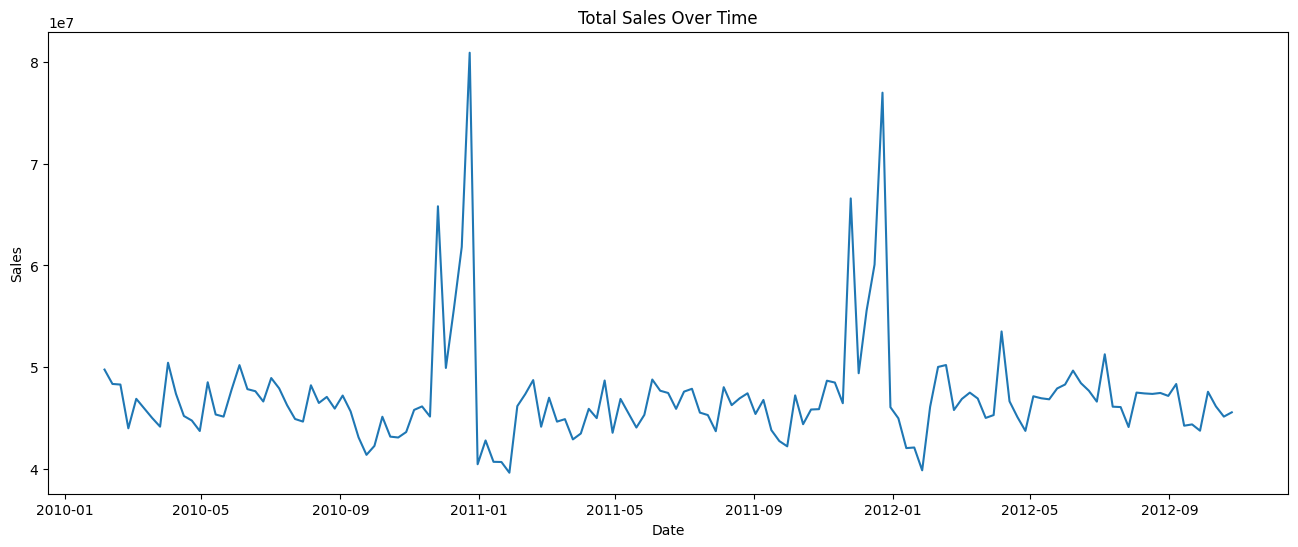

In [21]:
plt.figure(figsize=[16,6])
sns.lineplot(total_sales)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [22]:
# Sales by store 
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

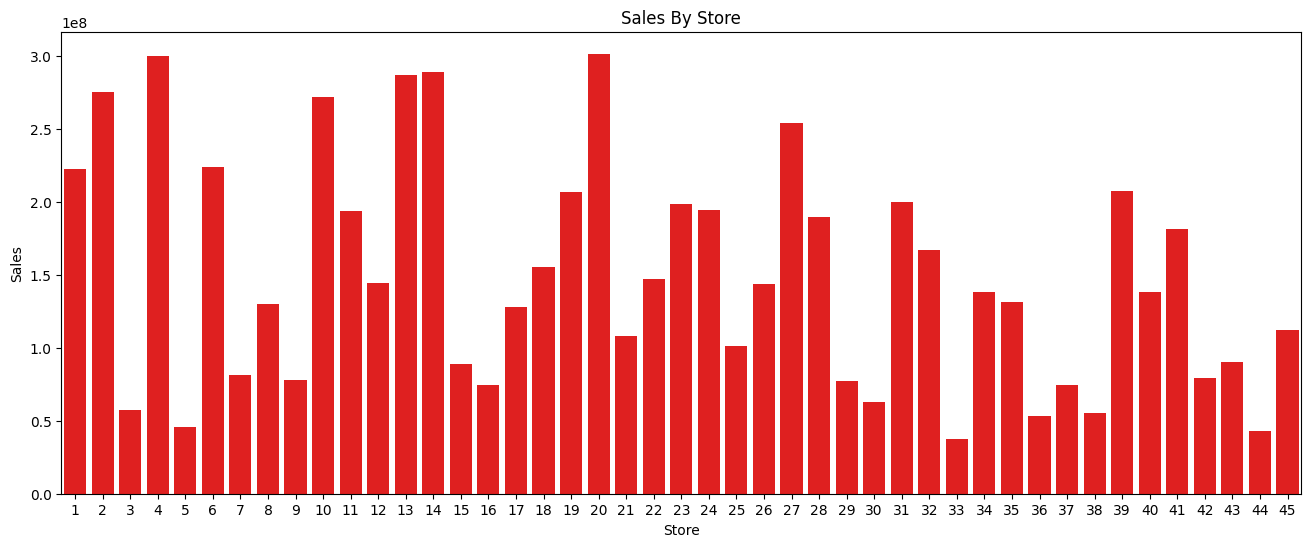

In [23]:
plt.figure(figsize=(16,6))
sns.barplot(store_sales,color='red')
plt.title('Sales By Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

In [24]:
# Sales By Department 
sale_dept = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)
sale_dept_1 = sale_dept.head(15)

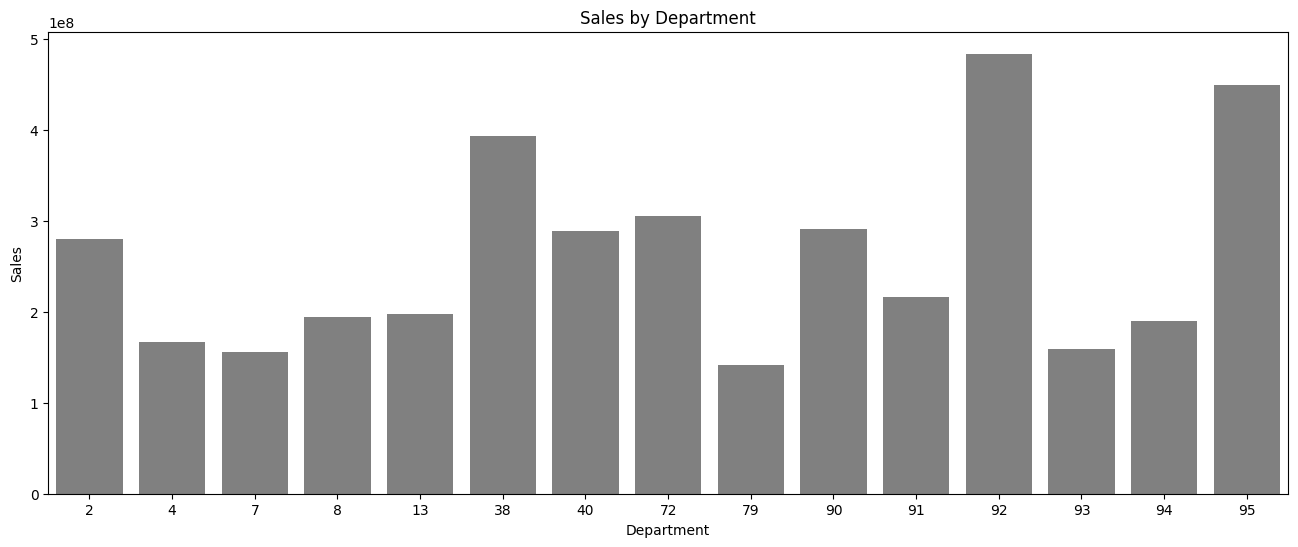

In [25]:
plt.figure(figsize=[16,6])
sns.barplot(sale_dept_1,color='grey')
plt.title('Sales by Department')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.show()

In [26]:
# Effect of Holidays 
effect_holiday = df.groupby('IsHoliday')['Weekly_Sales'].mean()

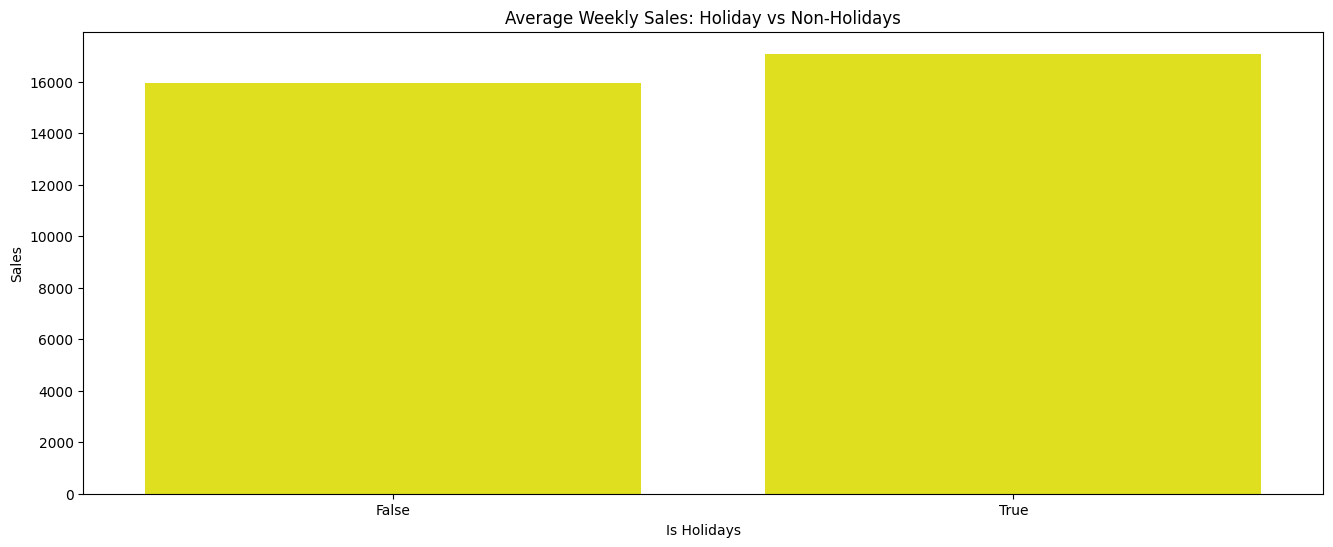

In [27]:
plt.figure(figsize=[16,6])
sns.barplot(effect_holiday,color='yellow')
plt.title('Average Weekly Sales: Holiday vs Non-Holidays')
plt.xlabel('Is Holidays')
plt.ylabel('Sales')
plt.show()

In [28]:
# Store Type Analysis 
store_type = df.groupby('Type')['Weekly_Sales'].mean()

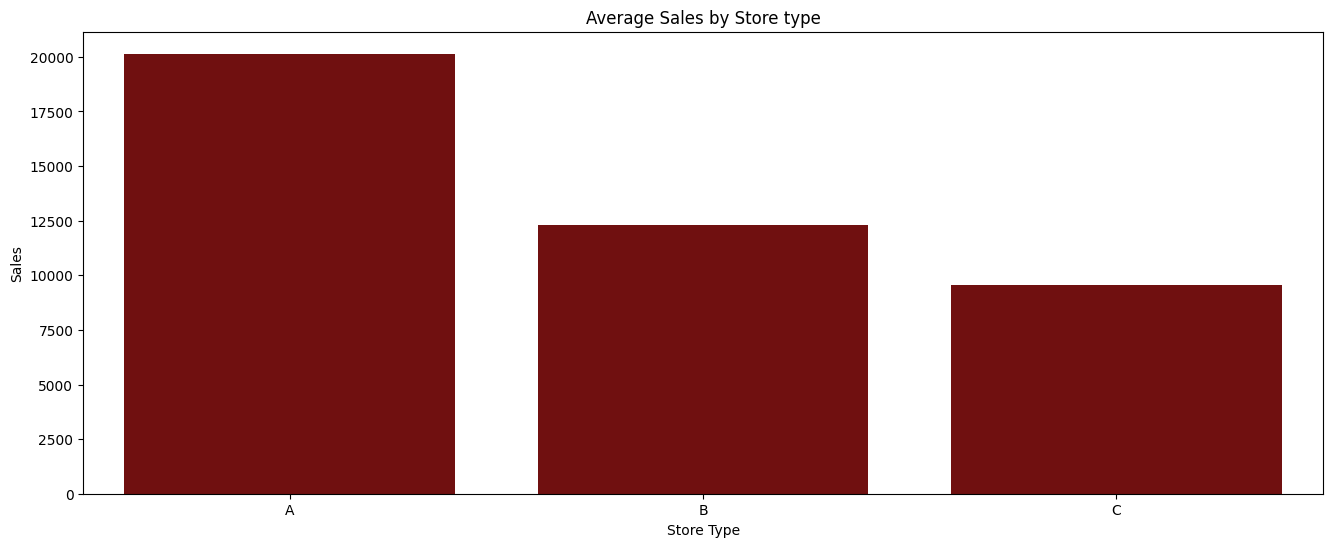

In [29]:
plt.figure(figsize=[16,6])
sns.barplot(store_type,color='maroon')
plt.title('Average Sales by Store type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

# ANOMALY DETECTION

## Anomaly Detection in Sales data 

In [30]:
# Aggregate weekly sales 

weekly_sale = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [31]:
# Calculating rolling mean and STD 

weekly_sale['rolling_mean'] = weekly_sale['Weekly_Sales'].rolling(window=4,center=True).mean()
weekly_sale['rolling_std'] = weekly_sale['Weekly_Sales'].rolling(window=4,center=True).std()

- Rolling mean

      - average sales of the last 4 weeks 

      - smooth trend.

- Rolling std

      - standard deviation of those 4 weeks

      - how much values fluctuate.

- Why?

      This gives us a “normal range” of sales.

In [32]:
# Define Anomaly

weekly_sale['anomaly'] = (
    (weekly_sale['Weekly_Sales'] > weekly_sale['rolling_mean'] + 1*weekly_sale['rolling_std']) |
    (weekly_sale['Weekly_Sales'] < weekly_sale['rolling_mean'] - 1*weekly_sale['rolling_std'])
)

In [33]:
weekly_sale['anomaly'].unique()

array([False,  True])

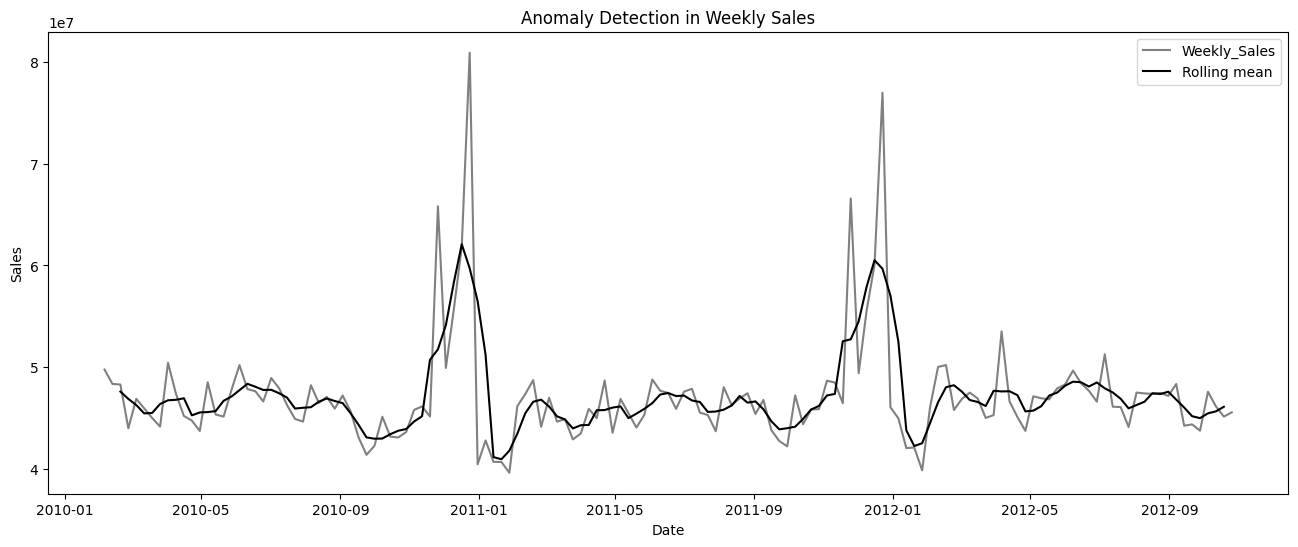

In [34]:
# Plotting Anomalies

plt.figure(figsize=[16,6])
sns.lineplot(x='Date',y='Weekly_Sales',data=weekly_sale,label = 'Weekly_Sales',color='grey')
sns.lineplot(x='Date',y='rolling_mean',data=weekly_sale,label = 'Rolling mean',color='black')
plt.title('Anomaly Detection in Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Time Based Anomaly detection 

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [36]:
weekly_sale['Date'] = pd.to_datetime(weekly_sale['Date'],format='%d/%m/%Y')

In [37]:
# Setting index 

ts = weekly_sale.set_index('Date')['Weekly_Sales'].asfreq('W-FRI')

ts = ts.ffill().bfill()

In [38]:
result = seasonal_decompose(ts, model="additive", period=52)

<Figure size 1600x600 with 0 Axes>

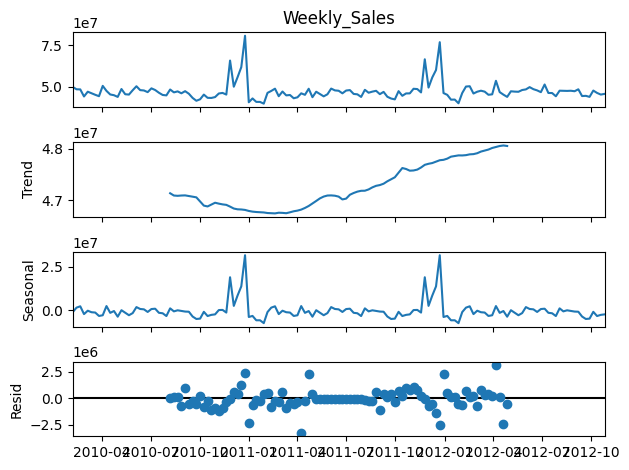

In [39]:
# Plotting components (result)

plt.figure(figsize=[16,6])
result.plot()
plt.tight_layout()
plt.show()

In [40]:
# flas large residuals as anomalies

resid = result.resid.dropna()
z = (resid - resid.mean())/resid.std()
anomalies_decomp = z[abs(z) > 2]

print("Decomposition-based anomalies (dates):")
print(anomalies_decomp.index.date)

Decomposition-based anomalies (dates):
[datetime.date(2010, 12, 24) datetime.date(2010, 12, 31)
 datetime.date(2011, 4, 8) datetime.date(2011, 4, 22)
 datetime.date(2011, 12, 23) datetime.date(2011, 12, 30)
 datetime.date(2012, 4, 6) datetime.date(2012, 4, 20)]


# FEATURE ENGINEERING

In [41]:
# Numeric holiday 

df['IsHoliday_int'] = df['IsHoliday'].astype(int)

In [42]:
# Store Size Bucket

df['Store_size_bucket'] = pd.qcut(df['Size'],q=3,labels=['Small','Medium','Large'])

In [43]:
# Aggregating features per store 

store_agg = df.groupby('Store').agg(
    avg_weekly_sales = ('Weekly_Sales','mean'),
    std_weekly_sales = ('Weekly_Sales','std'),
    avg_markdown1 = ('MarkDown1','mean'),
    avg_markdown2 = ('MarkDown2','mean'),
    size = ('Size','first'),
    type=('Type','first')
).reset_index()

In [44]:
store_agg["Type_num"] = store_agg["type"].map({"A":0, "B":1, "C":2})

In [45]:
store_agg.drop('type',axis=1,inplace=True)

In [46]:
store_agg.head()

,Store,avg_weekly_sales,std_weekly_sales,avg_markdown1,avg_markdown2,size,Type_num
0,1,21742.767306,27756.511620,2884.651478,873.446627,151315,0
1,2,26956.456098,33089.242950,3815.281183,1564.342794,202307,0
2,3,6379.519870,14256.653327,1105.119316,294.562961,37392,1
3,4,29175.540012,34585.999350,3353.061197,1377.544490,205863,0
4,5,5065.283995,8073.915024,1079.023512,298.620454,34875,1


In [47]:
store_agg.head()

,Store,avg_weekly_sales,std_weekly_sales,avg_markdown1,avg_markdown2,size,Type_num
0,1,21742.767306,27756.511620,2884.651478,873.446627,151315,0
1,2,26956.456098,33089.242950,3815.281183,1564.342794,202307,0
2,3,6379.519870,14256.653327,1105.119316,294.562961,37392,1
3,4,29175.540012,34585.999350,3353.061197,1377.544490,205863,0
4,5,5065.283995,8073.915024,1079.023512,298.620454,34875,1


## Customer Segmentation Analysis

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
# Preparing features 

X = store_agg[['avg_weekly_sales','std_weekly_sales','avg_markdown1','avg_markdown2','size']].fillna(0)

In [50]:
X_scaled = StandardScaler().fit_transform(X)

In [51]:
# Checking for 'k' values for clustering using Silhouette score

score = {}
for k in range(2,11):
    km = KMeans(n_clusters=k,random_state=123).fit(X_scaled)
    score[k] = silhouette_score(X_scaled, km.labels_)

print('Silhouette Score : ',score)

Silhouette Score :  {2: 0.4770131215362884, 3: 0.470878853919614, 4: 0.43787704590023224, 5: 0.39572902073687527, 6: 0.4277432626738289, 7: 0.33071684814311475, 8: 0.32334551510204435, 9: 0.3153813477530753, 10: 0.29294785635182563}


In [52]:
best_k = max(score,key=score.get)

In [53]:
print(best_k)

2


In [54]:
# Using k = 2

kmeans = KMeans(n_clusters=2,random_state=123).fit(X_scaled)
store_agg['Cluster'] = kmeans.labels_

In [55]:
store_agg.groupby('Cluster').mean()

,Store,avg_weekly_sales,std_weekly_sales,avg_markdown1,avg_markdown2,size,Type_num
Cluster,,,,,,,
0,26.583333,10047.763842,14003.58751,1500.925808,431.633735,86266.125000,1.000000
1,18.904762,21698.559347,26181.38486,3513.433851,1274.625604,180597.857143,0.238095


## Market-basket Analysis

      Dept1  Dept2      corr
1813     24     33  0.981377
376       5     55  0.942768
5824     90     92  0.938477
507       7     23  0.936403
1105     14     55  0.934020
337       5     14  0.929886
2217     29     32  0.926634
499       7     14  0.926405
1073     14     22  0.911781
1235     17     22  0.911286


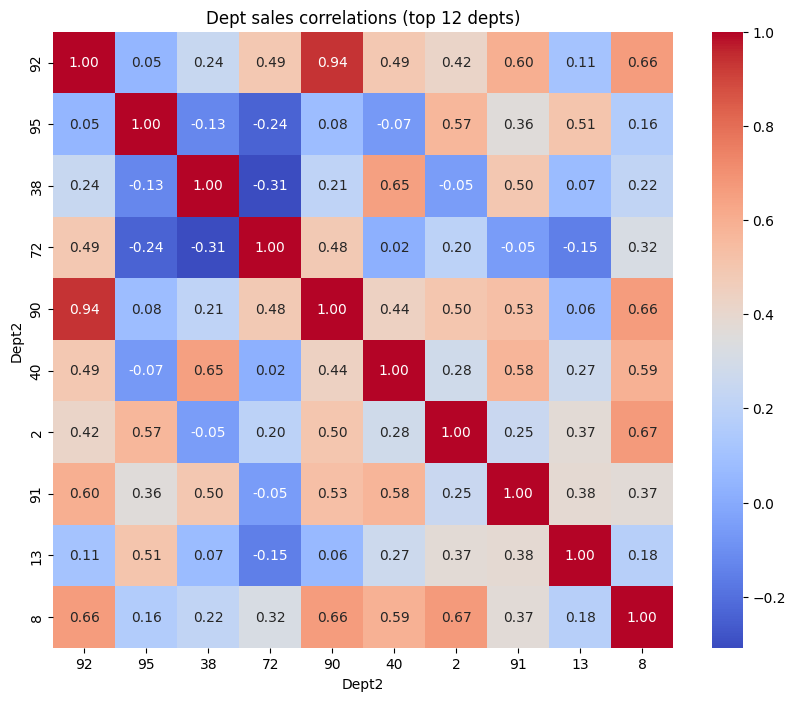

In [56]:
# Pivot table
dept_sales = df.pivot_table(values='Weekly_Sales', index='Date', columns='Dept', aggfunc='sum').fillna(0)


dept_corr = dept_sales.corr()


dept_corr.index.name = "Dept1"   # rename index
dept_corr.columns.name = "Dept2" # rename columns

corr_unstack = dept_corr.stack().reset_index()
corr_unstack.columns = ["Dept1", "Dept2", "corr"]


corr_unstack = corr_unstack[corr_unstack["Dept1"] < corr_unstack["Dept2"]]

In [ ]:
top_pairs = corr_unstack.sort_values("corr", ascending=False).head(10)
print(top_pairs)

In [ ]:
top_depts = dept_sales.sum().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10,8))
sns.heatmap(dept_sales[top_depts].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Dept sales correlations (top 12 depts)")
plt.show()

## Demand Forecasting

C:\Anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
10:57:40 - cmdstanpy - INFO - Chain [1] start processing
10:57:40 - cmdstanpy - INFO - Chain [1] done processing


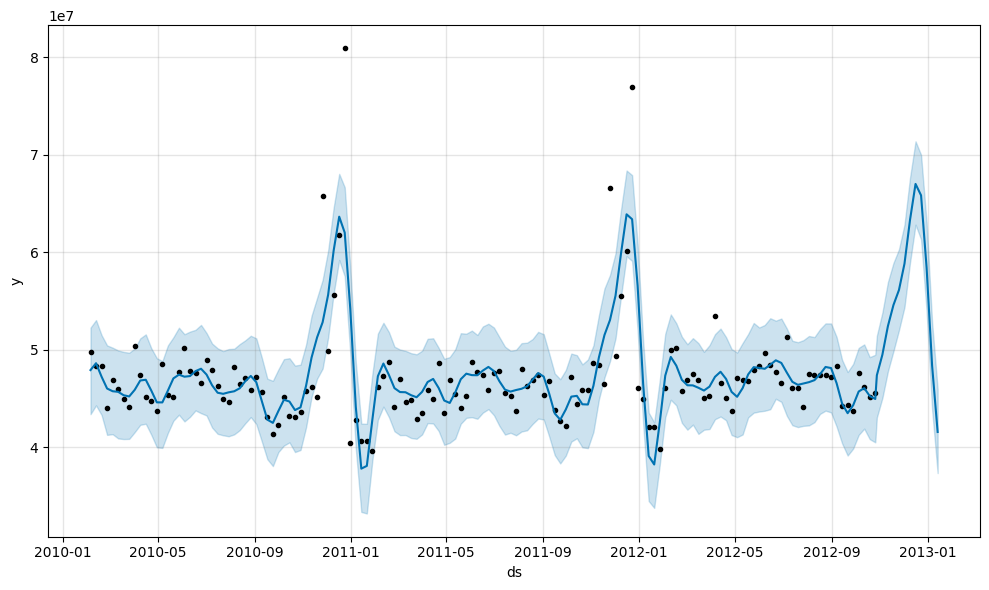

In [57]:
# If not installed: pip install prophet
from prophet import Prophet

# Prepare data for Prophet (ds, y)
ts_prop = weekly_sale[['Date','Weekly_Sales']].rename(columns={'Date':'ds','Weekly_Sales':'y'})

m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
# Add holiday effects if you have a holiday calendar; Prophet has built-in capacity
m.fit(ts_prop)

future = m.make_future_dataframe(periods=12, freq='W')
forecast = m.predict(future)
m.plot(forecast)
plt.show()

## Segmentation Quality evaluation 

In [58]:
from sklearn.metrics import silhouette_score
X = X_scaled  # from clustering step
score = silhouette_score(X, kmeans.labels_)
print("Silhouette score:", score)


Silhouette score: 0.4770131215362884


# Conclusion

- By combining anomaly detection, segmentation, forecasting, and correlation analysis, this project delivers a comprehensive retail analytics framework.
- The insights enable personalized store strategies, better inventory planning, and effective promotions, leading to improved efficiency, reduced costs, and higher customer satisfaction.